## ADM1F SRT: single tank and two-phase anaerobic dynamic membrane bioreactor

This script is used to simulate a single tank suspended anaerobic dynamic membrane digester and a novel two-phase anaerobic dynamic membrane bioreator with separated SRT and HRT. In the two-phase reactor the effluent (model output) from the first phase dynamic membrane bioreactor is converted to the influent (model input) for the second-phase anaerobic dynamic membrane bioreactor as shown in the figure.

**Note:** Before running the ADM1F SRT simulations see intructions on how to compile `adm1f_srt.cxx` in the User Guide.


**Mass balance equation with SRT:**

The ADM1 and ADM1F solve the mass balance equation (i.e. mass_change = mass_in – mass_out + reaction). ADM1F_SRT version of the model includes solid retention time  ($t_{res,X}$) as shown in the equation below. 

$$
\frac{d\, S_{\text{liq,i}}}{dt} = \frac{qS_{\text{in,i}}}{V_{\text{liq}}} - \frac{qS_{\text{liq,i}} }{V_{\text{liq}}}+ \sum_{j=1}^{12}\rho_{j} v_{i,j}
$$

$$
\frac{d\, X_{\text{liq,i}}}{dt} = \frac{qX_{\text{in,i}}}{V_{\text{liq}}} - \frac{X_{\text{liq,i}}}{t_{\text{res,X}} + V_{\text{liq}}/q} + \sum_{j=13}^{24}\rho_{j} v_{i,j}
$$

Authors: Wenjuan Zhang, Elchin Jafarov, Kuang Zhu

In [1]:
# Load packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import adm1f_utils as adm1fu
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# navigate to simulations folder
os.chdir('../simulations')

In [3]:
# Grab the names and unit of all the outputs
(output_name,output_unit)=adm1fu.get_output_names()

In [4]:
#check the path to the executable
!echo $ADM1F_EXE

/Users/elchin/project/ADM1F_WM/build/adm1f


### Single tank anaerobic dynamic membrane bioreactor (AnDMBR)

To simulate the single tank AnDMBR that has separated SRT and HRT, We can call the function`reactor1` with different Q (flow-rate), Vliq (reactor volume), t_resx (SRT-HRT) values, the function will return the corresponding output

Usage example: reactor1(Q=100, t_resx=30, Vliq=300) 

**(Unit)** Q: [m3/d], t_resx: [day], Vliq: [m3]

In [5]:
# testing different SRTs=[0,1,2,...9] on the one-phase reactor
resx_list = [i for i in range(10)]
# setup the matrix with columns correspoding SRTs and rows to outputs
output1_resx = np.zeros((len(resx_list), 67))
# here we utilize back euler solver and adataptive time step
# for more command options see "User Guide/Running ADM1F/step 5"
options='-ts_type beuler -ts_adapt_type basic -ts_max_snes_failures -1 -steady'

for i in range(len(resx_list)):
    output1_resx[i] = adm1fu.reactor1(opt=options, Vliq=300, Q=600, t_resx=resx_list[i])
    
np.savetxt('output_1phase.csv',output1_resx,delimiter=',',fmt='%1.4e')

Reactor run, phase-one:
$ADM1F_EXE -ts_type beuler -ts_adapt_type basic -ts_max_snes_failures -1 -steady -Vliq 300 -t_resx 0 -influent_file influent_cur.dat
indicator-228.out
Reactor run, phase-one:
$ADM1F_EXE -ts_type beuler -ts_adapt_type basic -ts_max_snes_failures -1 -steady -Vliq 300 -t_resx 1 -influent_file influent_cur.dat
indicator-307.out
Reactor run, phase-one:
$ADM1F_EXE -ts_type beuler -ts_adapt_type basic -ts_max_snes_failures -1 -steady -Vliq 300 -t_resx 2 -influent_file influent_cur.dat
indicator-437.out
Reactor run, phase-one:
$ADM1F_EXE -ts_type beuler -ts_adapt_type basic -ts_max_snes_failures -1 -steady -Vliq 300 -t_resx 3 -influent_file influent_cur.dat
indicator-575.out
Reactor run, phase-one:
$ADM1F_EXE -ts_type beuler -ts_adapt_type basic -ts_max_snes_failures -1 -steady -Vliq 300 -t_resx 4 -influent_file influent_cur.dat
indicator-522.out
Reactor run, phase-one:
$ADM1F_EXE -ts_type beuler -ts_adapt_type basic -ts_max_snes_failures -1 -steady -Vliq 300 -t_resx 5 

In [6]:
df1_resx = pd.read_csv('output_1phase.csv', sep=',', header=None)
df1_resx.columns = output_name  
df1_resx.insert(0,"T_resx",resx_list)

**Relation between t_resx and output when Vliq=300m3, Q=600m3/d**</font>

In [7]:
# check the results with increasing T_resx, we should expect decrease in Ssu
df1_resx

,T_resx,Ssu,Saa,Sfa,Sva,Sbu,Spro,Sac,Sh2,Sch4,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
0,0,2152.800,324.2700,7382.70,2381.700,3667.300,2542.700,8263.5,25.643000,1.484300e-72,...,44957.0,0.053067,1074.00,7382.70,1.831600e-72,83.808,3.9774,0.351490,-2.542300e-62,0.5
1,1,123.060,49.1670,7751.20,2574.400,4202.900,3244.500,9600.7,30.352000,3.859800e-12,...,59182.0,0.047701,1135.60,7751.20,1.599000e-12,100.630,-76.4800,0.310840,1.255000e-08,0.5
2,2,63.057,26.6380,7839.00,2610.000,4268.600,3305.000,9742.9,30.772000,1.085400e-09,...,61421.0,0.048208,1150.90,7839.00,4.422100e-10,102.210,-155.0200,0.304150,2.777100e-07,0.5
3,3,39.313,17.3450,908.17,41.129,54.118,53.411,3339.7,0.000662,2.574900e+02,...,16289.0,2.513100,963.02,908.17,5.579800e+01,209.380,-218.4400,0.200760,9.097300e+00,0.5
4,4,30.634,13.5750,457.21,30.592,39.989,35.895,3066.6,0.000515,2.653300e+02,...,18846.0,3.157300,963.70,457.21,5.623900e+01,214.510,-304.2100,0.157850,1.324200e+01,0.5
5,5,25.261,11.2240,309.54,24.543,31.958,27.254,2856.4,0.000424,2.695900e+02,...,21319.0,3.693200,966.73,309.54,5.648800e+01,217.230,-390.0200,0.129290,1.778600e+01,0.5
6,6,21.606,9.6181,236.08,20.615,26.775,22.111,2685.8,0.000362,2.726300e+02,...,23721.0,4.147900,970.17,236.08,5.666900e+01,219.140,-475.6200,0.108900,2.279000e+01,0.5
7,7,18.960,8.4513,192.14,17.859,23.153,18.702,2543.7,0.000317,2.750200e+02,...,26050.0,4.540600,973.69,192.14,5.681200e+01,220.630,-560.8900,0.093693,2.825000e+01,0.5
8,8,16.955,7.5651,162.86,15.817,20.478,16.276,2423.1,0.000284,2.770000e+02,...,28311.0,4.885500,977.21,162.86,5.692900e+01,221.870,-645.8600,0.081982,3.416800e+01,0.5
9,9,15.383,6.8691,141.96,14.244,18.422,14.462,2319.3,0.000257,2.786900e+02,...,30505.0,5.192300,980.68,141.96,5.702800e+01,222.920,-730.4900,0.072728,4.053400e+01,0.5


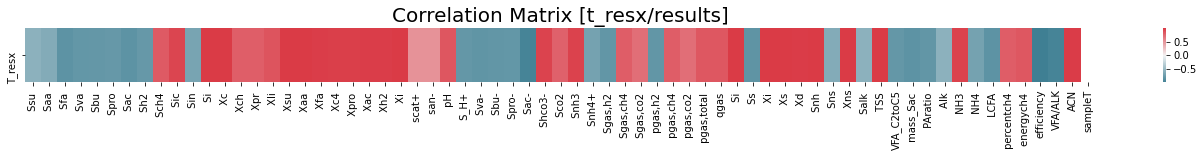

In [8]:
# correlation between SRT and output
plt.figure(figsize=(24,1))
corr1=df1_resx.corr()
sns.heatmap(corr1.iloc[0:1,-67:], xticklabels=df1_resx.columns[-67:], yticklabels=df1_resx.columns[0:1], cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Matrix [t_resx/results]',fontsize=20);

**Configurations**

| Configuration |  Vliq (m$^3$) | t\_resx (d) | Q (m$^3$/d)|  
| ------ | ------ | ------ | ------|
Default | 3400 | 0 | 134 |
Phase 1 | 340 | 1.5 | 618 |
Phase 2 | 3400 | 700 | 618/--- |

where t\_resx = SRT - HRT

In [9]:
config_default = {'Vliq':3400, 't_resx':0, 'Q':134}
config1 = {'Vliq':340, 't_resx':1.5, 'Q':618}
config2 = {'Vliq':3400, 't_resx':700, 'Q':618}

#### Default Configuration

In [10]:
# output using default configuration
ls_default = adm1fu.reactor1(**config_default).tolist()
df_default = pd.DataFrame(data = [ls_default],columns=output_name, index=['Default Configuration'])
df_default

Reactor run, phase-one:
$ADM1F_EXE  -Vliq 3400 -t_resx 0 -influent_file influent_cur.dat
indicator-034.out


,Ssu,Saa,Sfa,Sva,Sbu,Spro,Sac,Sh2,Sch4,Sic,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
Default Configuration,7.17674,3.21796,54.9446,6.39778,8.23228,6.08339,1963.6,0.00012,48.3303,639.764,...,8438.52,9.32395,1026.69,54.9446,56.905,65.228,53.3712,0.220453,109.164,25.3731


#### Configuration 1

In [11]:
# output using configuration 1
ls_config1 = adm1fu.reactor1(**config1).tolist()
df_config1 = pd.DataFrame(data = [ls_config1],columns=output_name, index=['Phase 1 Configuration'])
df_config1

Reactor run, phase-one:
$ADM1F_EXE  -Vliq 340 -t_resx 1.5 -influent_file influent_cur.dat
indicator-051.out


,Ssu,Saa,Sfa,Sva,Sbu,Spro,Sac,Sh2,Sch4,Sic,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
Phase 1 Configuration,80.5616,33.4704,7808.75,2598.14,4246.87,3285.25,9696.05,28.5069,7.771710e-32,147.214,...,60316.4,0.048011,1145.6,7808.75,3.068330e-32,104.203,-104.737,0.308161,1.216580e-18,0.550162


#### Configuration 2

In [12]:
# output using configuration 2
ls_config2 = adm1fu.reactor1(**config2).tolist()
df_config2 = pd.DataFrame(data = [ls_config2],columns=output_name, index=['Phase 2 Configuration'])
df_config2

Reactor run, phase-one:
$ADM1F_EXE  -Vliq 3400 -t_resx 700 -influent_file influent_cur.dat
indicator-025.out


,Ssu,Saa,Sfa,Sva,Sbu,Spro,Sac,Sh2,Sch4,Sic,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
Phase 2 Configuration,2.70068,1.20723,19.0168,2.34856,3.01652,2.16597,1125.18,0.000045,75.1774,952.376,...,21574.7,14.7549,1186.64,19.0168,58.194,255.569,-899.833,0.049221,3302.96,5.50162


### Two-Phase anaerobic dynamic membrane bioreactor

To simulate a novel two-phase AnDMBR, We can call the function `reactor2` with different Q1 (phase 1 flow rate), Q2 (phase 2 flow rate, normally equal to Q1), Vliq1 (phase 1 volume), Vliq2 (phase 2 volume), t_resx1 (SRT-HRT for phase 1), and t_resx2 (SRT-HRT for phase 1) values. In this function, the model output from phase 1 will be extracted and converted to the model input for phase 2. The function will return phase1 output and phase2 output

Usage example: reactor2(Q1=100,  t_resx1=30, t_resx2=100, Vliq1=300, Vliq2=3000) 

Schematics of the two-phase reactor


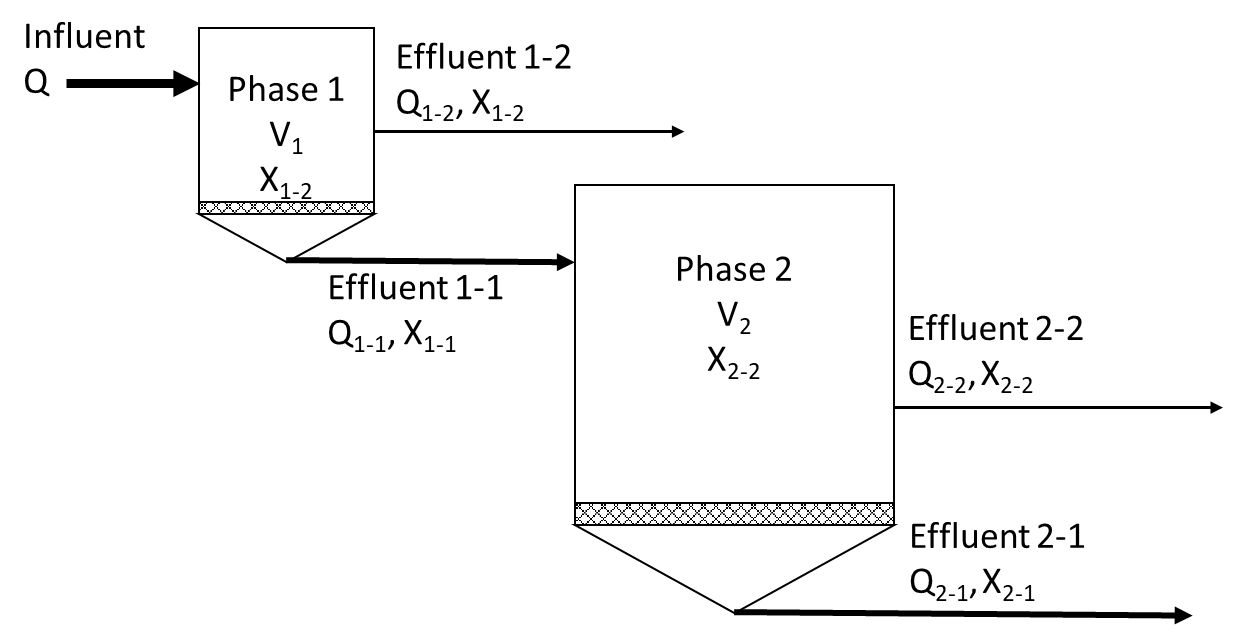

In [13]:
from IPython.display import Image
print ('Schematics of the two-phase reactor')
Image(filename='../notebooks/2phase_reactor.png')

#### Config12

**Configurations**

| Configuration |  Vliq (m$^3$) | t\_resx (d) | Q (m$^3$/d)|  
| ------ | ------ | ------ | ------|
Default | 3400 | 0 | 134 |
Phase 1 | 340 | 1.5 | 618 |
Phase 2 | 3400 | 700 | 618/--- |

where t\_resx = SRT - HRT

In [14]:
# config12 = {"Vliq1":340, "Vliq2":3400, "t_resx1":1.5, "t_resx2":700, "Q1":618, "Q2":618}
config12 = {"Vliq1":340, "Vliq2":3400, "t_resx1":1.5, "t_resx2":700, "Q1":618}

In [15]:
result_config12 = adm1fu.reactor2(**config12)

Reactor run, phase-one:
$ADM1F_EXE  -Vliq 340 -t_resx 1.5 -influent_file influent_cur.dat
indicator-051.out
Reactor run, phase-two:
$ADM1F_EXE -Vliq 3400 -t_resx 700 -influent_file influent_cur.dat
indicator-024.out


In [16]:
# output using config12
result_config12 = adm1fu.reactor2(**config12)
ls1_config12 = result_config12[0].tolist()
ls2_config12 = result_config12[1].tolist()

df_config12 = pd.DataFrame(data = [ls1_config12],columns=output_name,index=['Phase1'])
df_config12.loc['Phase2'] = ls2_config12
df_config12

Reactor run, phase-one:
$ADM1F_EXE  -Vliq 340 -t_resx 1.5 -influent_file influent_cur.dat
indicator-051.out
Reactor run, phase-two:
$ADM1F_EXE -Vliq 3400 -t_resx 700 -influent_file influent_cur.dat
indicator-024.out


,Ssu,Saa,Sfa,Sva,Sbu,Spro,Sac,Sh2,Sch4,Sic,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
Phase1,80.561600,33.470400,7808.7500,2598.14000,4246.87000,3285.25000,9696.05,28.506900,7.771710e-32,147.214,...,60316.4,0.048011,1145.6,7808.7500,3.068330e-32,104.203,-104.737,0.308161,1.216580e-18,0.550162
Phase2,0.355681,0.132504,19.2757,2.37729,3.05196,2.19399,1248.96,0.000046,7.114040e+01,867.356,...,17101.8,15.289200,1139.4,19.2757,6.198330e+01,192.277,-590.307,0.068884,-2.807000e+01,6.241160
